# Importing Necccesary Package

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing biopython and other biostatistic package

In [4]:
!pip install biopython
import Bio  # Import the Biopython library
from Bio import SeqIO  # Import the SeqIO module for sequence manipulation
from Bio import AlignIO

#importing of the RNA seq fastq file (Illuminia)

In [5]:
from Bio import SeqIO
demo_file_path= r"C:\Users\iyand\Documents\Project 8\demo.fastq"
sequence= SeqIO.parse(demo_file_path, 'fastq')
######
for i, sequences in enumerate(sequence):
    if i < 10:
        print(f"ID: {sequences.id}")
        print(f"Description: {sequences.description}")
        print(f"Sequence length: {len(sequences.seq)}")
        print(f"Sequence: {sequences.seq}")
        print(f"Quality scores: {sequences.letter_annotations['phred_quality']}")
        print("\n" + "-"*30 + "\n")

ID: SRR960459.1
Description: SRR960459.1 HWI-ST330:304:H045HADXX:1:1101:1162:2055 length=100
Sequence length: 100
Sequence: NAGAACTTGGCGGCGAATGGGCTGACCGCTTCCTCGTGCTTTACGGTATCGCCGCTCCCGATTCGCAGCGCATCGCCTTCTATCGCCTTCTTGACGAGTT
Quality scores: [2, 16, 28, 35, 35, 37, 37, 37, 39, 39, 39, 38, 39, 40, 41, 41, 41, 41, 40, 41, 41, 41, 38, 36, 38, 38, 32, 37, 38, 33, 39, 39, 36, 39, 38, 37, 33, 37, 37, 35, 36, 35, 36, 34, 35, 35, 32, 28, 28, 34, 33, 31, 33, 35, 35, 35, 35, 35, 30, 26, 33, 12, 27, 34, 33, 35, 35, 35, 29, 33, 33, 33, 33, 35, 35, 33, 20, 27, 31, 35, 35, 35, 34, 35, 35, 33, 31, 12, 24, 32, 34, 35, 35, 35, 35, 33, 30, 33, 27, 30]

------------------------------

ID: SRR960459.2
Description: SRR960459.2 HWI-ST330:304:H045HADXX:1:1101:1132:2129 length=100
Sequence length: 100
Sequence: CTCCTTACTATGCAGGACAAGCAAATGCCTGTGAAACCATTCAGTTTAATGCAGGCCTTTCAATAAAAATGCATTTTAAATAATACAGGCTTTAAAAATA
Quality scores: [31, 34, 34, 37, 37, 37, 37, 37, 39, 38, 39, 39, 39, 41, 41, 41, 33, 39, 40, 41, 36, 

# Quality control  and GC content Analysis

GC content Analysis of The Read

In [6]:

GC_content_of_seq = []

sequences = list(SeqIO.parse(demo_file_path, 'fastq'))

for seq_record in sequences:
    if "G" in seq_record.seq or "C" in seq_record.seq:
        gc_content = (seq_record.seq.count("G") + seq_record.seq.count("C")) / len(seq_record.seq) * 100
        GC_content_of_seq.append(gc_content)

# Print the calculated GC contents
print("GC Contents:", GC_content_of_seq)


GC Contents: [57.99999999999999, 33.0, 36.0, 53.0, 52.0, 59.0, 67.0, 34.0, 33.0, 59.0, 27.0, 39.0, 30.0, 51.0, 52.0, 27.0, 47.0, 60.0, 42.0, 41.0, 57.99999999999999, 59.0, 57.99999999999999, 44.0, 61.0, 82.0, 48.0, 55.00000000000001, 25.0, 40.0, 55.00000000000001, 49.0, 72.0, 45.0, 39.0, 49.0, 41.0, 73.0, 47.0, 56.00000000000001, 27.0, 25.0, 52.0, 49.0, 40.0, 57.99999999999999, 56.00000000000001, 59.0, 54.0, 23.0, 39.0, 51.0, 55.00000000000001, 44.0, 44.0, 47.0, 54.0, 62.0, 48.0, 46.0, 54.0, 44.0, 64.0, 49.0, 56.00000000000001, 31.0, 60.0, 42.0, 66.0, 37.0, 50.0, 42.0, 37.0, 45.0, 36.0, 38.0, 59.0, 61.0, 44.0, 45.0, 56.00000000000001, 59.0, 45.0, 39.0, 51.0, 31.0, 41.0, 55.00000000000001, 49.0, 42.0, 42.0, 37.0, 36.0, 45.0, 49.0, 40.0, 40.0, 45.0, 52.0, 66.0, 41.0, 52.0, 35.0, 56.99999999999999, 53.0, 62.0, 63.0, 38.0, 27.0, 56.00000000000001, 65.0, 48.0, 32.0, 49.0, 55.00000000000001, 54.0, 31.0, 28.999999999999996, 46.0, 55.00000000000001, 70.0, 43.0, 24.0, 60.0, 50.0, 38.0, 32.0, 62

VISUALIZATION OF THE GC contents

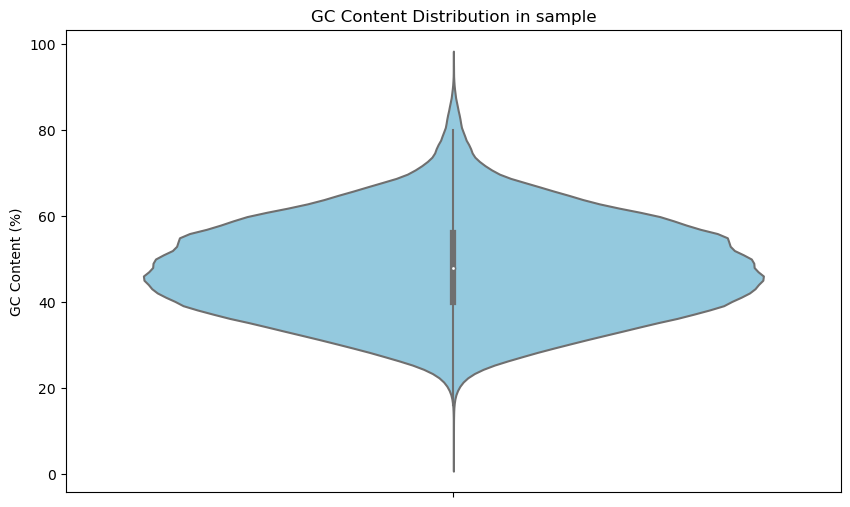

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=GC_content_of_seq, color='skyblue')
plt.title('GC Content Distribution in sample')
plt.ylabel('GC Content (%)')
plt.show()

Sequnece Quality control

In [8]:
#QC_link: file:///C:/Users/iyand/Documents/Project%208/demo_fastqc.html

Before Trimming


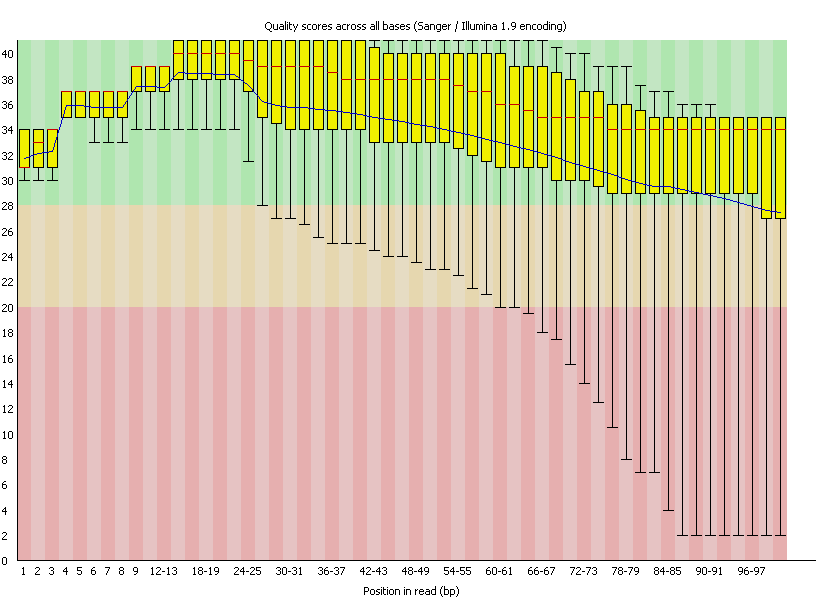

In [9]:
from IPython.display import Image

image_path = r"C:\Users\iyand\Documents\Project 8\Per_base sequence quality.png"
print('Before Trimming')
Image(filename=image_path)


The base are of good quality, and basically does not need a significant trimming, but i want to go ahead to trim few base at the end and no adapter content

# Timming using Trimmomatic

In [10]:
import subprocess
# Specify the paths to your input and output FASTQ files
input_fastq = r"C:\Users\iyand\Documents\Project 8\demo.fastq"
output_fastq = r"C:\Users\iyand\Documents\Project 8\demo_trimmed.fastq"

# Run Trimomatic command using subprocess
trimomatic_command = [
    "java", "-jar", r"C:\Users\iyand\Downloads\Trimmomatic-0.39\Trimmomatic-0.39\trimmomatic-0.39.jar",
    "SE", "-threads", "4", input_fastq, output_fastq, "TRAILING:10", "-phred33"
]

result = subprocess.run(trimomatic_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Print the result
print("Return Code:", result.returncode)
print("Standard Output:", result.stdout)
print("Standard Error:", result.stderr)


Return Code: 0
Standard Output: 
Standard Error: TrimmomaticSE: Started with arguments:
 -threads 4 C:\Users\iyand\Documents\Project 8\demo.fastq C:\Users\iyand\Documents\Project 8\demo_trimmed.fastq TRAILING:10 -phred33
Input Reads: 1250000 Surviving: 1249800 (99.98%) Dropped: 200 (0.02%)
TrimmomaticSE: Completed successfully



Another Quality control analysis on the trimmed Data

In [11]:
#QC_trimmed_link: file:///C:/Users/iyand/Documents/Project%208/demo_trimmed_fastqc.html

After Trimming


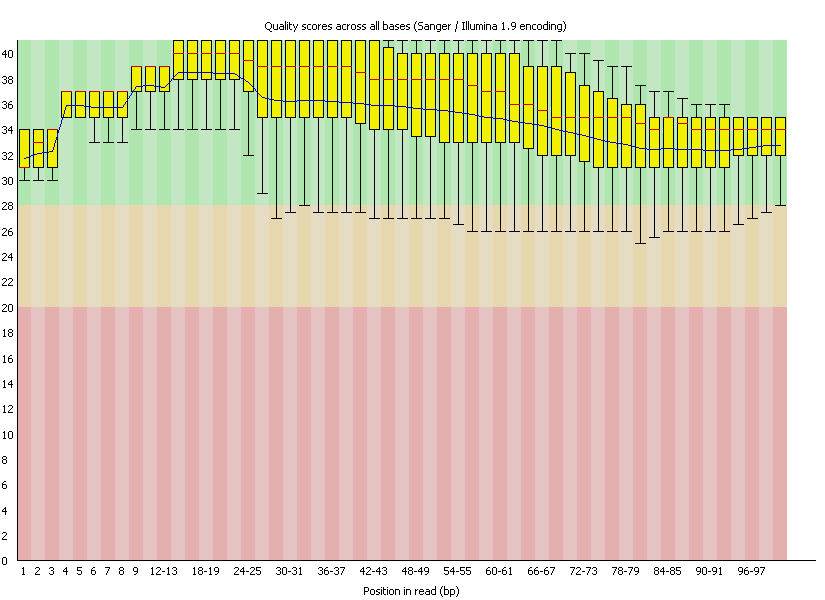

In [12]:
from IPython.display import Image

image_path = r"C:\Users\iyand\Documents\Project 8\trimmed_Per_base sequence quality.png"
print('After Trimming')
Image(filename=image_path)


# Reads Alignment process

check the next file with name Read alignment